#### From the presented task, I am to work with the WHO data to give my recommendations on how to come up with a policy framework.

#### The DeltaSquare is an NGO that works with the government on matters of social policy about how to change the lives of underprivilegded in the society. It is a classification project and I should be able to draw insights from my findings.

In [73]:
# To import the different libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
from utils import histogram_boxplot, labeled_barplot

from warnings import filterwarnings
filterwarnings('ignore')

sns.set()

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (accuracy_score,
                             mean_squared_error,
                             f1_score,
                             precision_score,
                             recall_score,
                             precision_recall_curve,
                             roc_auc_score,
                             roc_curve,
                             ConfusionMatrixDisplay,
                             confusion_matrix)

from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# For building decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [12]:
# To load the dataset by reading the csv file in pandas

data = pd.read_csv("who_data.csv")

In [13]:
data

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [29]:
# check the shape of the data
print(f' The data have {data.shape[0]} rows and {data.shape[1]} columns')

 The data have 32561 rows and 15 columns


In [14]:
# To check the first 5 rows of the data

data.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
# To check the data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education_no_of_years   32561 non-null  int64 
 5   marital_status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital_gain            32561 non-null  int64 
 11  capital_loss            32561 non-null  int64 
 12  working_hours_per_week  32561 non-null  int64 
 13  native_country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

In [16]:
# The data descriptive statistics

data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_no_of_years,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
working_hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


### Data Exploration

In [17]:
# To check the counts

data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

From the Workclass column, it is observed that there are 1,836 people with workclass which is unknown.

In [18]:
# To check the counts

data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

From the occupation column, it is observed that there are 1,843 people with unknown occupation.

In [20]:
# To check the counts

data['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [21]:
# To check the counts

data['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [22]:
# To check the counts

data['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [23]:
# To check the counts

data['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [24]:
# To check the counts

data['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [25]:
# To check the counts

data['native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

From the native country column, it is observed that 583 people has country - unknown

In [26]:
# Checking for the unknown occupation data

occ = data[data['occupation'] == ' ?']

In [27]:
occ['salary'].value_counts()

 <=50K    1652
 >50K      191
Name: salary, dtype: int64

In [28]:
occ['occupation'].value_counts()

 ?    1843
Name: occupation, dtype: int64

Because we can't make assumptions of the figures for the unknown occupation, work class and country, and their figures could be observed not to be so significant, we will drop the rows where such issues are seen.
There are so many reasons why people fail to disclose some of their data especially if they are into illegitimate acts. It could also be error by the staff who was inputting the details.

In [31]:
# Make a copy of the data

df = data.copy()

In [32]:
# To drop rows with '?' by replacing with nan and the dropping

df['occupation'] = df['occupation'].replace(' ?', np.nan)
df['workclass'] = df['workclass'].replace(' ?', np.nan)
df['native_country'] = df['native_country'].replace(' ?', np.nan)

In [33]:
df.dropna(inplace=True)

In [34]:
# To check the shape of the df again

print(f' The data have {df.shape[0]} rows and {df.shape[1]} columns')

 The data have 30162 rows and 15 columns


In [36]:
# To check the data descriptive statistics again

data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_no_of_years,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital_status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The salaries are observed to be of two classes: less than or equal to 50k, and greater than or equal to 50k.

In [37]:
# To encode  <= 50 to 1 ... and > 50 as 0

df['salary'].replace({' <=50K': 1, ' >50K': 0}, inplace = True)


# Casting salary to integer

df['salary'] = df['salary'].astype(int)

In [38]:
#Check for duplicate, so it can be dealt with

duplicate = df.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 23 duplicated rows in the data


In [39]:
# To drop the duplicates and reset index

df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

### Visualization

In [40]:
# To assign columns

columns = list(df)[:-1]

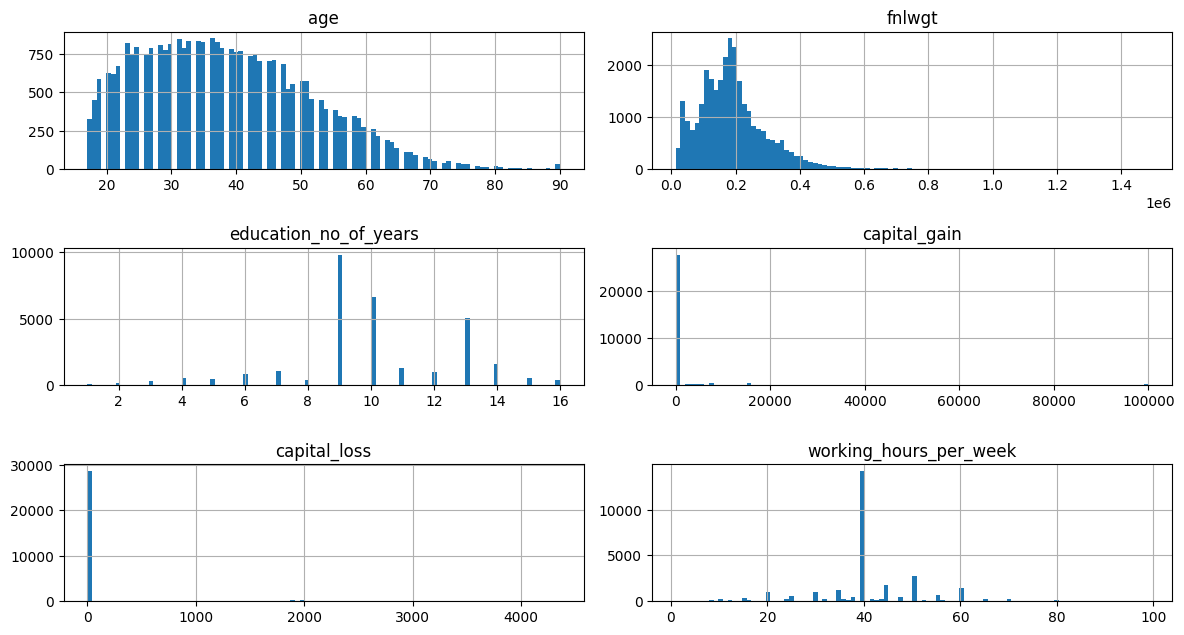

In [41]:
df[columns].hist(stacked = False, bins = 100, figsize=(12,30),
                  layout=(14,2));
plt.tight_layout()

From the above plots, 

In age plot, we observe that majority of the workforce are between age 20 to 50 years.

The number of education is majorly 9 to 10 years and then 13 years from the plot.

The capital gain and capital loss are majorly 0 which could mean that the individuals are neither in loss nor gain.

More people tend to work averagely at 40hrs per week as shown in the graph.

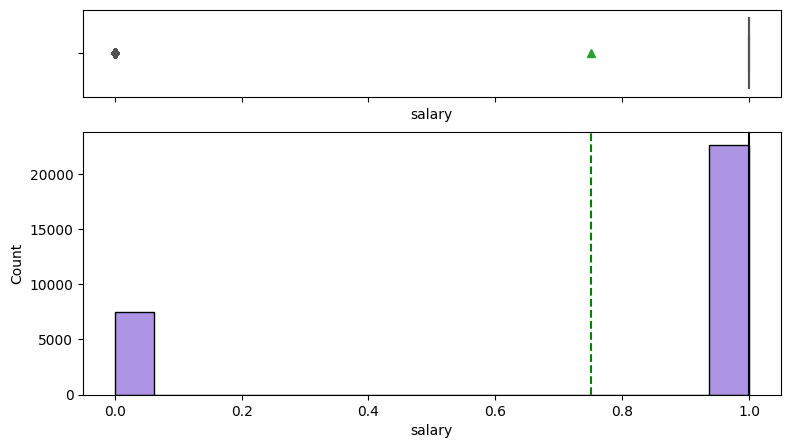

In [42]:
# To visualize the encoded salary plot

histogram_boxplot(data = df, feature='salary')

From the above graph the number of people that earns <= 50k (which is encoded as 1.0) are higher than earns >= 50k (which is encoded as 0.0). This shows that the class has imbalance data

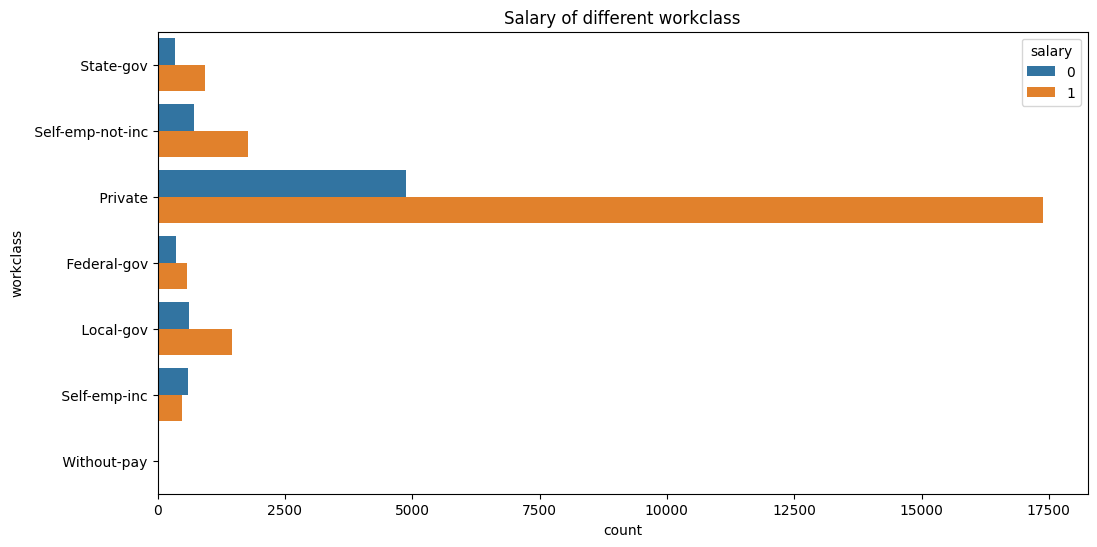

In [43]:
# To view salaries of the workclass

plt.figure(figsize=(12,6))
sns.countplot(data=df, y="workclass", hue="salary")

plt.title('Salary of different workclass');

From the above plot,

It is observed that the number of people working in private organization who earn 50k and above are more amongst all the other workclass.

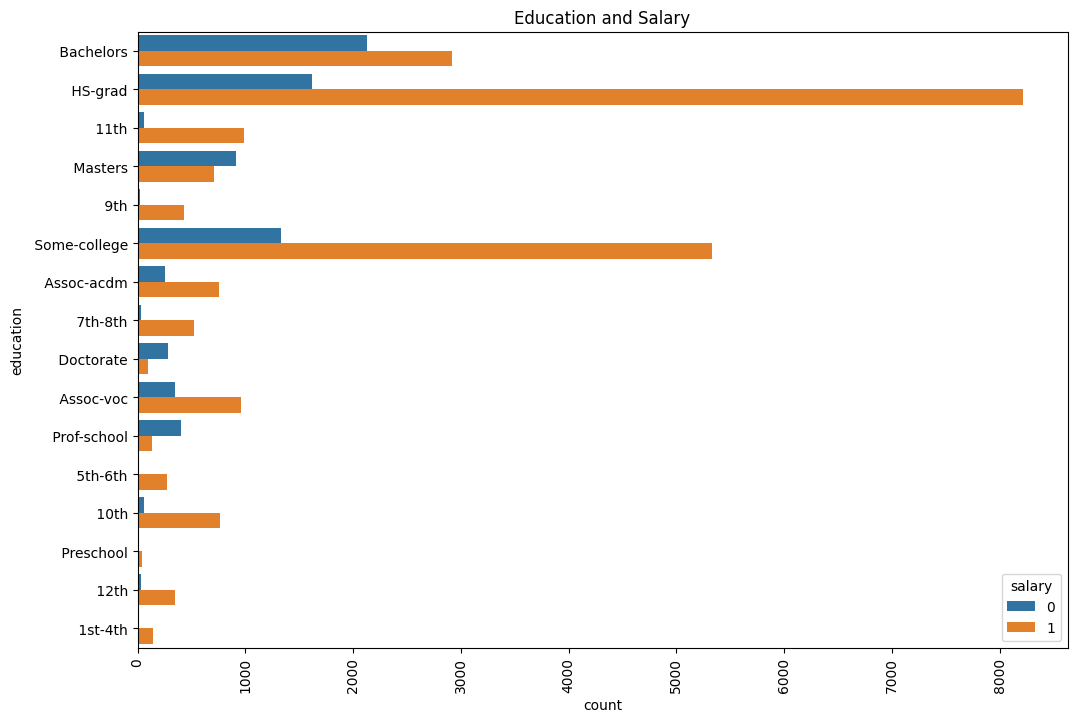

In [44]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, y="education", hue="salary")
plt.xticks(rotation = 90)
plt.title('Education and Salary');

From the above plot, it can be deduced that

Education could have effect on salary as many of them earned 50k and above, especially those with bachelors, HS-grad, masters and college.

### Bivariate Analysis

<AxesSubplot: >

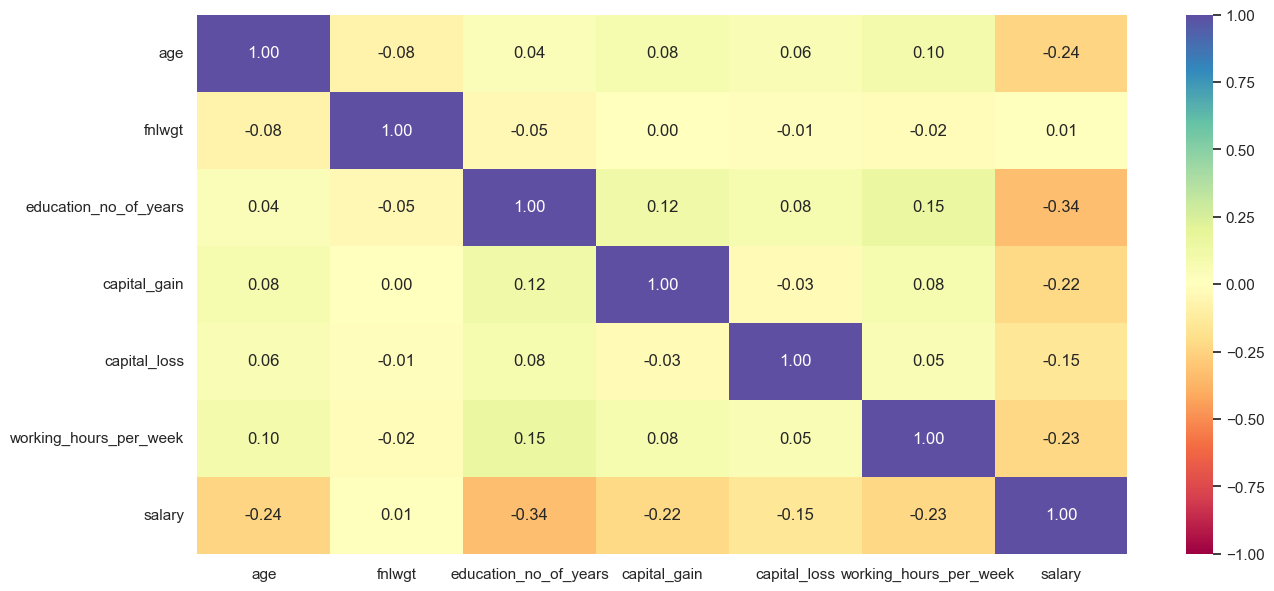

In [52]:
# To plot a heatmap of the correlation

plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

From the heatmap plot,
I observed that the education years had effect on salary than the rest of the variables.
The independent variables had a correlation of > 0.5.
The other variables did not have much effect on each other.

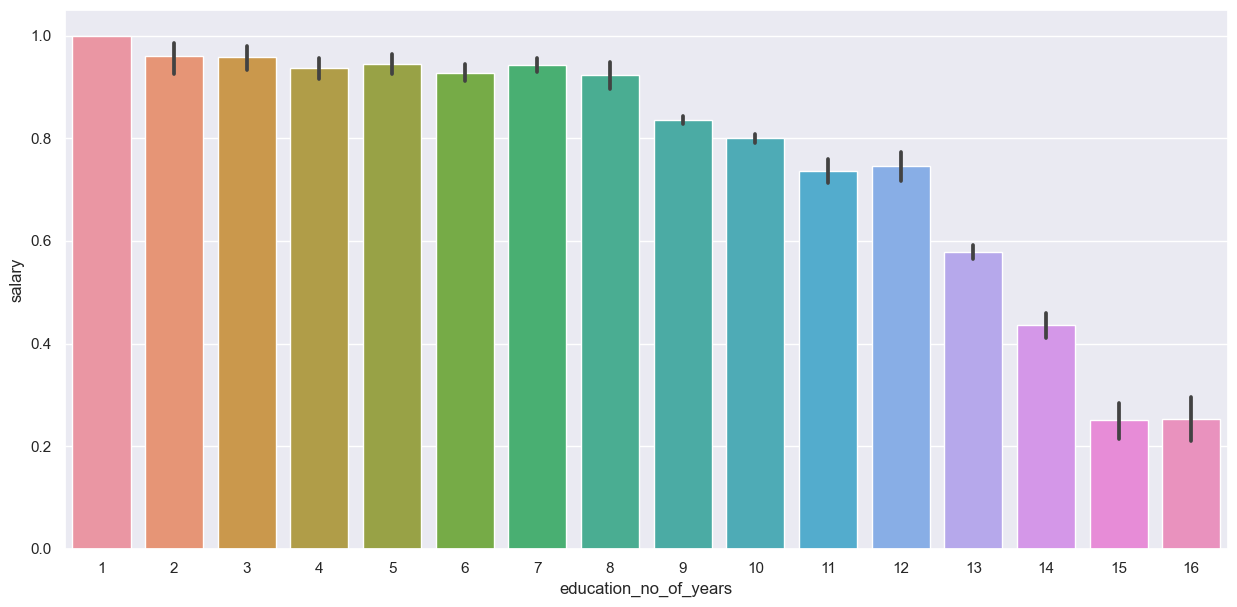

In [53]:
#Further plot on education number of years

plt.figure(figsize = (15,7))
sns.barplot(y='salary', x= 'education_no_of_years', data = df)
plt.show()

The above plot shows that the salary of >50k is maintained with the number of education years, however decreases from 9 years to 16 years as observed in the plot. 

In [55]:
df_num = df.select_dtypes(exclude ='object') # this obtains the numerical data type
df_obj = df.select_dtypes(include = 'object') # this obtains all the datatypes that are objects

We will exclude independent variables like 'fnlwgt' because it is shown not have an effect on the salary as shown in the charts above.

We will include independant variables like age, workclass, education_no_years, working_hours_per_week, capital_loss, capital_gain

In [56]:
X = df[['workclass','age','education_no_of_years','working_hours_per_week', 'capital_loss','capital_gain']]
y = df['salary']

In [57]:
X = pd.get_dummies(X, drop_first=True) # one-hot encoding the work class

In [60]:
#Checking the shape of both the X and y variables

X.shape, y.shape

((30139, 11), (30139,))

In [62]:
# Split into train, validation and test data

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,
                                                           random_state= 0,
                                                           stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                 y_train_val,
                                                 test_size=0.2,
                                                 random_state=0,
                                                 stratify=y_train_val)
# Stratify splits the data and maintain the proportion of both classes in classification

In [63]:
X_train_val.shape, X_test.shape, y_train_val.shape, y_test.shape

((24111, 11), (6028, 11), (24111,), (6028,))

#### Function to train and evaluate the model accuracy

In [65]:
# function to train a model and compute train accuracy

def train(model, X,y):
    """
    Function to train the model and compute accuracy
    
    model: Model algorithm not yet traineed
    X: train features
    y: train target
    """
    
    trained_model = model.fit(X,y)
    preds = trained_model.predict(X)
    acc = accuracy_score(y, preds)
    
    print(f'Trained Accuracy: {acc}')
    return trained_model


# function to evaluate the model and compute metrics on test data
def evaluate(model,X,y, threshold = 0.5): # the higher the thres the more strict u are, y can be validation or test data
    """
    function to evaluate our trained model with different metrics
    
    model: trained model(classifier)
    X: validation features
    y: target in validation data
    
    threshold: values to filter predictions
    """
    pred_proba = model.predict_proba(X)[:, 1] # it predicts two columns but we are interested in the 1class (True)
    pred_class = np.round(pred_proba > threshold) # convert to 0 or 1
    acc = accuracy_score(y, pred_class)
    recall = recall_score(y, pred_class)
    precision = precision_score(y, pred_class)
    f1 = f1_score(y, pred_class)
    
    df = pd.DataFrame({
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1": f1
    }, index =[0])
    
    conf = confusion_matrix(y, pred_class, labels=[0,1]) # confusion matrix
    disp = ConfusionMatrixDisplay(conf, display_labels=[0,1])
    disp.plot()
    plt.show()
    
    return df

#### Normalization

In [66]:
# Creating an instance of the Normalization

scaler = MinMaxScaler()

In [67]:
# Scaling the data

X_train_val_sc = scaler.fit_transform(X_train_val)
X_test_sc = scaler.transform(X_test)

#### Building the model

In [68]:
log_reg = LogisticRegression(random_state=0)

In [69]:
# Check train accuracy

log_reg_model = train(log_reg,X_train_val_sc, y_train_val ) # model with training sample

Trained Accuracy: 0.8080544149973041


The train data has the rate of 81% accuracy

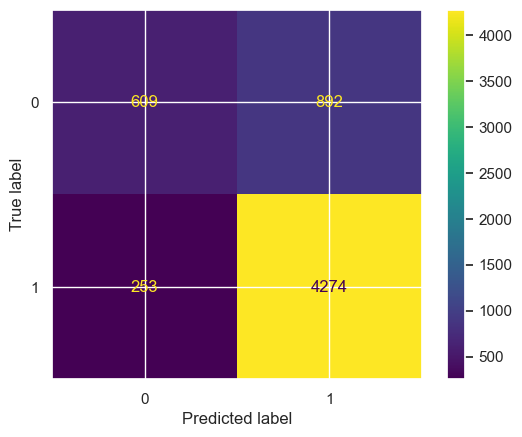

,Accuracy,Precision,Recall,F1
0,0.810053,0.827333,0.944113,0.881874


In [74]:
eva_log = evaluate(log_reg_model, X_test_sc, y_test) # Evaluation of the model
eva_log

From the confusion matrix:

Out of 4527 working class people, the model incorrectly predicted that 253 earns > 50k and correctly predicted 4274 earns <= 50k

There are 1501 who earn > 50k and the model is predicting that 892 of them earns <=50k salary

From the Precision: 

Out of the number of people the model predicted to earn <=50k the model predicted 83% correctly

From the Recall: 

Out of all the people in the data that earns <=50k the model predicted only 94% correctly

The aim is to build a model that can predict the number of people that earns less than 50k for the organization.

In [75]:
# Further inference

Improvement on the model metrics...here we are considering a situation where the True Postive rates are far from the Far Positive rates

In [76]:
# define a function for ROC and AUC curves to get the best threshold
def droc_curve(model, X, y):
    """
    Function to create ROC Curve
    
    model: trained model
    X: test or validaton features
    y: target in the test data
    """
    preds = log_reg.predict_proba(X_test_sc)[:,1]
    auc = roc_auc_score(y_test, preds)
    fpr, tpr, thre = roc_curve(y_test,preds)

    plt.figure(figsize=(7,5))
    plt.plot(fpr,tpr,label = f'Logistic regression {auc:.2f}')

    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim(0.0,1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel ("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc = 'lower right')
    plt.show()
    
    return thre, tpr, fpr # threshold
# using the threshold to tweak the model

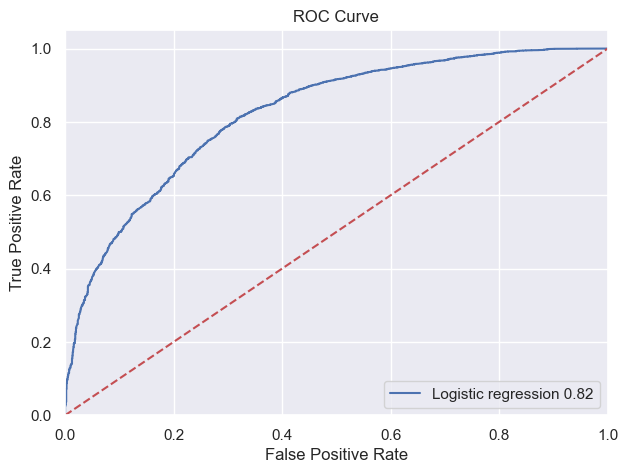

In [77]:
thre, tpr, fpr= droc_curve(log_reg_model, X_test_sc, y_test)

In [78]:
optimal_idx = np.argmax(tpr-fpr) # we need the position of the maximum different we use argmax

print (f' The threshold is at {optimal_idx}')

 The threshold is at 1182


In [79]:
optimal_thre = thre[optimal_idx]
optimal_thre

0.7109050572363383

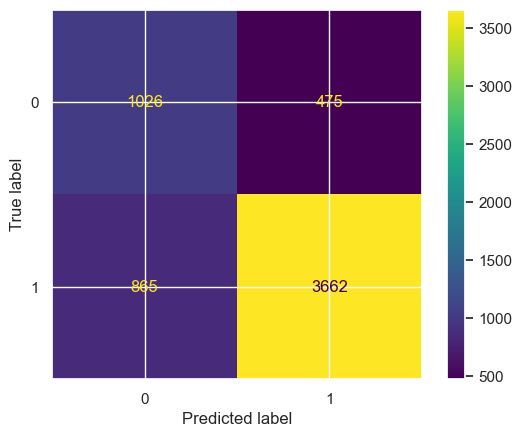

,Accuracy,Precision,Recall,F1
0,0.777704,0.885182,0.808924,0.845337


In [80]:
# Evaluation of the model

eva_log =evaluate(log_reg_model, X_test_sc, y_test, threshold= optimal_thre)
eva_log

From the confusion matrix:

Out of 4527 working class people, the model incorrectly predicted that 865 earns > 50k and correctly predicted 3662 earns > 50k

There are 1501 who earn > 50k and the model is wrongly predicting that 475 of them earns <=50k salary

From the Precision: 

Out of the number of people the model predicted to earn <=50k only 89% earns >50k

From the Recall: 

Out of all the people in the data that earns <=50k the model predicted 81% correctly

In [81]:
# Further inference

For model improvement we look at model hyperparameters...Here we rebuild the model when we get the optimal accuracy

In [83]:
c_values = np.random.rand(5,2).flatten() # The default value of c is 1, 

accs = []
for c in c_values:
    model = LogisticRegression(C=c)
    model.fit(X_train_val_sc, y_train_val)
    acc = model.score(X_test_sc, y_test)
    accs.append(acc)

In [84]:
optimal_idx = np.argmax(accs)

optimal_c = c_values[optimal_idx]

print(f' The optimal value of C = {optimal_c}')

 The optimal value of C = 0.8335635812341965


Trained Accuracy: 0.8072663929326863


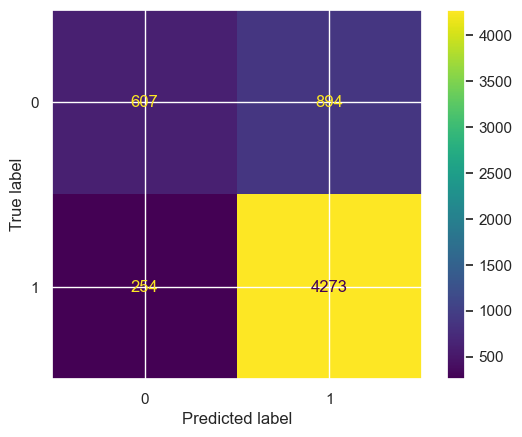

,Accuracy,Precision,Recall,F1
0,0.809555,0.826979,0.943892,0.881576


In [86]:
log_reg_c = LogisticRegression(random_state=0, C = optimal_c)

# calling the training function and evaluate function

log_reg_c_model = train(log_reg_c, X_train_val_sc, y_train_val) 

df_c = evaluate(log_reg_c_model, X_test_sc, y_test)
df_c

From the confusion matrix:

Out of 4,527 working class people, the model incorrectly predicted that 254 earns > 50k and correctly predicted 4273 earns <= 50k

There are 1,501 who earn > 50k and the model is wrongly predicting that 894 of them earns <=50k salary

From the Precision: 

Out of the number of people the model predicted to earn >50k only 83% earns <=50k

From the Recall:

Out of all the people in the data that earns <=50k the model predicted 94% correctly.

In [87]:
# Further inference

Model Improvement from the data aspect...Here we rebuild the model when we get the optimal accuracy

In [90]:
# Balancing the original data before splitting, 
# Only balance the training data to see if it will differentiate from new data
# Define a function to balance the data

def balance_data(X, y, smote_type):
    """
    X: Train features
    y: Train target
    smote_type: Kind of imbalance strategy
    """
    
    X_res, y_res = smote_type.fit_resample(X,y) # generating artificial data
    return X_res, y_res

In [91]:
# Creating an instance of all the imblearn methods

under = RandomUnderSampler(random_state=0)
over = RandomOverSampler(random_state=0)
smote = SMOTE(random_state=0)
adasyn = ADASYN(random_state=0)

In [92]:
X_train_un,y_train_un = balance_data(X_train_val_sc, y_train_val, under)
X_train_ov,y_train_ov = balance_data(X_train_val_sc, y_train_val, over)
X_train_sm,y_train_sm = balance_data(X_train_val_sc, y_train_val, smote)
X_train_ad,y_train_ad = balance_data(X_train_val_sc, y_train_val, adasyn)

In [93]:
# to count the data target

from collections import Counter

Counter(y_train_un) # now the classes are the same

Counter({0: 6005, 1: 6005})

#### Undersampling

Trained Accuracy: 0.7457951706910908


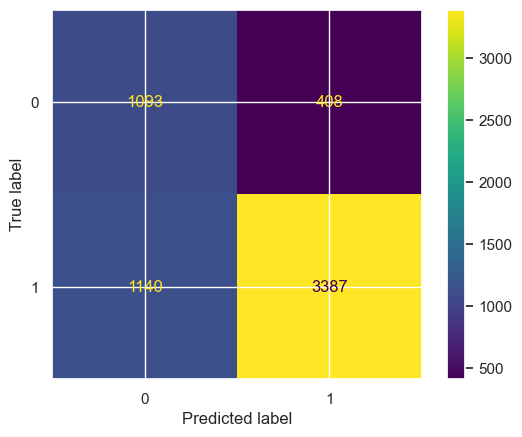

,Accuracy,Precision,Recall,F1
0,0.743198,0.89249,0.748178,0.813987


In [94]:
log_reg_un = train(log_reg,X_train_un,y_train_un)# using the default paramenter

df_un = evaluate(log_reg_un, X_test_sc,y_test) # we maintain the imbalance on the test data

df_un

From the confusion matrix:

Out of 4,527 working class people, the model incorrectly predicted that 1140 earns > 50k and correctly predicted 3387 earns <= 50k

There are 1,501 who earn > 50k and the model is wrongly predicting that 408 of them earns <=50k salary

From the Precision: 

Out of the number of people the model predicted to earn >50k only 89% earns <=50k

From the Recall:

Out of all the people in the data that earns <=50k the model predicted 75% correctly

#### Over Sampling

In [95]:
Counter(y_train_ov)

Counter({0: 18106, 1: 18106})

Trained Accuracy: 0.7455263448580581


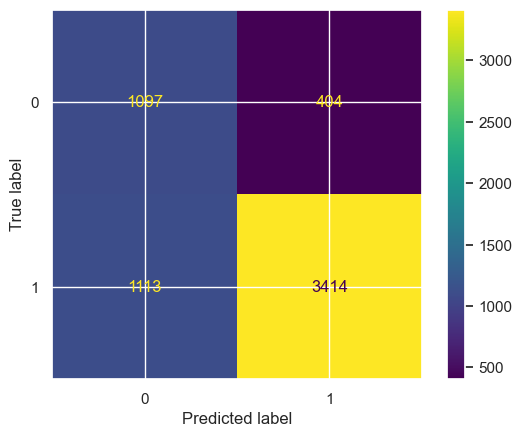

,Accuracy,Precision,Recall,F1
0,0.748341,0.894185,0.754142,0.818214


In [96]:
log_reg_ov = train(log_reg, X_train_ov, y_train_ov) # Using the default paramenter

df_ov = evaluate(log_reg_ov, X_test_sc, y_test)

df_ov

From the confusion matrix:

Out of 4,527 working class people, the model incorrectly predicted that 1113 earns > 50k and correctly predicted 3414 earns <= 50k

There are 1,501 who earn > 50k and the model is wrongly predicting that 404 of them earns <=50k salary

From the Precision:

Out of the number of people the model predicted to earn >50k only 89% earns <=50k

From the Recall: 

Out of all the people in the data that earns <=50k the model predicted 75% correctly

#### SMOTE

In [97]:
Counter(y_train_sm)

Counter({0: 18106, 1: 18106})

Trained Accuracy: 0.744863581133326


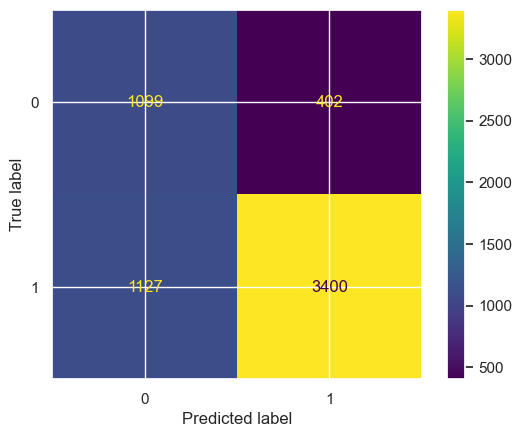

,Accuracy,Precision,Recall,F1
0,0.74635,0.894266,0.751049,0.816425


In [98]:
log_reg_sm = train(log_reg, X_train_sm, y_train_sm)# using the default paramenter

df_sm = evaluate(log_reg_sm, X_test_sc, y_test)

df_sm

From the confusion matrix:

Out of 4,527 working class people, the model incorrectly predicted that 1127 earns > 50k and correctly predicted 3400 earns <= 50k

There are 1,501 who earn > 50k and the model is wrongly predicting that 402 of them earns <=50k salary

From the Precision:

Out of the number of people the model predicted to earn >50k only 89% earns <=50k

From the Recall:

Out of all the people in the data that earns <=50k the model predicted 75% correctly

#### ADASYN

In [99]:
Counter(y_train_ad)

Counter({0: 18527, 1: 18106})

Trained Accuracy: 0.7079409275789589


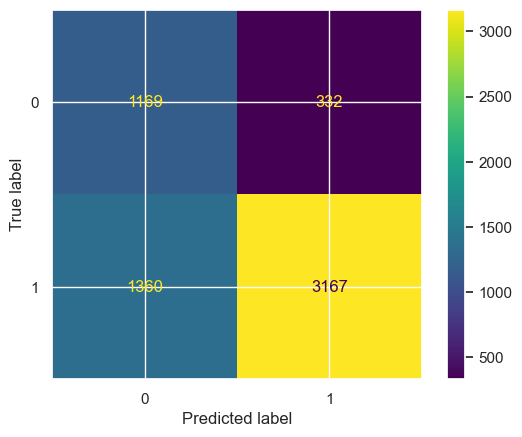

,Accuracy,Precision,Recall,F1
0,0.71931,0.905116,0.69958,0.789185


In [100]:
log_reg_ad = train(log_reg,X_train_ad,y_train_ad)# using the default paramenter

df_ad = evaluate(log_reg_ad, X_test_sc,y_test)

df_ad

From the confusion matrix:

Out of 4,527 working class people, the model incorrectly predicted that 1360 earns > 50k and correctly predicted 3167 earns <= 50k

There are 1,501 who earn > 50k and the model is wrongly predicting that 332 of them earns <=50k salary

From the Precision:

Out of the number of people the model predicted to earn >50k only 90% earns <=50k

From the Recall:

Out of all the people in the data that earns <=50k the model predicted 70% correctly

CONCLUSION:

From the EDA section, some rows were dropped because of the representations of "?" in some of the variables. This was done because I don't want to assume values that would affect the other remaining data.

From the models presented, it can be observed that the model improves at the first model with 94% recall value and 88% F1-score and the model hyperparameter section with the same percentage score and slightly different values for the TPs and FNs

From the other models presented, the mistakes the model is making are more.

RECOMMENDATION AND FINAL INSIGHT:

The aim of this analysis is to classify appropraitely, the salary classes for this non-governmental organization. It will be more expensive in using models with more wrong classification. I recommend that:

For cost reduction and good classification the first model with recall value of 94% and F1-score of 88% should be adopted. This was able to predict 4274 people that earns less than 50k out of 4507. It seemingly has the highest success rate and can be used to address the classification issue faced by the NGO.